[(2, 1), (5, 2)] 12


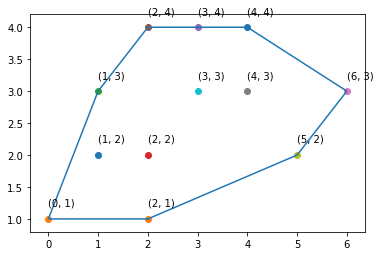

In [4]:
import matplotlib.pyplot as plt
import math
import copy
import numpy as np
class Point: 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y

def turntest(A,B,P):       
    c=copy.deepcopy(B)
    d=copy.deepcopy(P)
    c.x -= A.x 
    c.y -= A.y 
    d.x -= A.x 
    d.y -= A.y 
    cross_product = c.x * d.y - c.y * d.x  
    if (cross_product > 0): 
        return 1
    elif (cross_product < 0): 
        return -1
    else:
        return 0
    
def GrahamScan(pointlist):
    
    tuplelist=[]
    for i in range (0,len(pointlist)):
        tuplelist.append((pointlist[i].x,pointlist[i].y)) 
    cent=min(tuplelist, key = lambda t: t[1])
    tuplelist.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
    convex_hull=[]
    convex_hull.append(tuplelist[0])
    convex_hull.append(tuplelist[1])
    print(convex_hull,len(tuplelist))
    i=2
    while(i<len(tuplelist)):
        a=Point(convex_hull[-2][0],convex_hull[-2][1])
        b=Point(convex_hull[-1][0],convex_hull[-1][1])
        c=Point(tuplelist[i][0],tuplelist[i][1])
#         print((a.x,a.y),(b.x,b.y),(c.x,c.y))
        if turntest(a,b,c)==1:
            convex_hull.append(tuplelist[i])
            i=i+1
        else:
            convex_hull.pop()
#     print(convex_hull)
    convex_hull.append(convex_hull[0])
    xs, ys = zip(*convex_hull) 
    plt.figure()
    plt.plot(xs,ys)


pointlist = []
pointlist.append( Point(1,2) )
pointlist.append( Point(2,1) )
pointlist.append( Point(1,3) )
pointlist.append( Point(2,2) )
pointlist.append( Point(3,4) )
pointlist.append( Point(2,4) )
pointlist.append( Point(6,3) )
pointlist.append( Point(4,3) )
pointlist.append( Point(5,2) )
pointlist.append( Point(3,3) )
pointlist.append( Point(4,4) )
pointlist.append( Point(0,1) )



GrahamScan(pointlist)
for obj in pointlist:
    plt.scatter(obj.x, obj.y)
    plt.annotate((obj.x,obj.y), (obj.x, obj.y + 0.2))
    